Datasets are imported from: https://www.dropbox.com/sh/ud5sf1fy6m7o219/AAD9pkY5gYe_XYV2oHDw68uva?dl=0

## Libraries and methods

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/MyDrive/Magistrale/Stage/data"
root_dir = "/content/gdrive/MyDrive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#libraries
%cd "/content/gdrive/MyDrive/Magistrale/Stage/file"
import methods
import csv
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

/content/gdrive/MyDrive/Magistrale/Stage/file


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import of data

In [3]:
dataset = dict()

### ACE Inhibitors dataset

In [4]:
#import of data
dataset["ace"] = pd.read_csv(path + "/ACEInhibitors.tsv", sep='\t')
print(dataset["ace"].shape)
pd.set_option('display.max_columns', None)
display(dataset["ace"].head(3))

(2544, 53)


,PMID,OWN,STAT,DCOM,LR,IS,VI,IP,DP,Title,PG,Abstract,FAU,AU,AD,LA,PT,PL,TA,JT,JID,RN,SB,MH,EDAT,MHDA,CRDT,PHST,AID,PST,SO,GR,CIN,EIN,RF,CI,PMC,CON,OTO,OT,IR,FIR,IRAD,CRI,LID,CN,TT,OID,SPIN,DEP,ORI,RIN,Label
0,10024335,NLM,MEDLINE,19990309,20190722,0194-911X (Print) 0194-911X (Linking),33,2,1999 Feb,Distinct and combined vascular effects of ACE ...,719-25,Hypercholesterolemia and hypertension are freq...,"['Nazzaro, P', 'Manzari, M', 'Merlo, M', 'Trig...","['Nazzaro P', 'Manzari M', 'Merlo M', 'Triggia...",['Department of Clinical Methodology and Medic...,['eng'],"['Clinical Trial', 'Controlled Clinical Trial'...",United States,Hypertension,"Hypertension (Dallas, Tex. : 1979)",7906255,['0 (Angiotensin-Converting Enzyme Inhibitors)...,IM,"['Adult', 'Angiotensin-Converting Enzyme Inhib...",1999/02/19 00:00,1999/02/19 00:01,['1999/02/19 00:00'],"['1999/02/19 00:00 [pubmed]', '1999/02/19 00:0...",['10.1161/01.hyp.33.2.719 [doi]'],ppublish,Hypertension. 1999 Feb;33(2):719-25. doi: 10.1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10027665,NLM,MEDLINE,19990506,20190813,0031-6970 (Print) 0031-6970 (Linking),54,11,1999 Jan,Computerized surveillance of adverse drug reac...,887-92,OBJECTIVE: To implement and measure the effect...,"['Levy, M', 'Azaz-Livshits, T', 'Sadan, B', 'S...","['Levy M', 'Azaz-Livshits T', 'Sadan B', 'Shal...","['Department of Medicine, Hadassah University ...",['eng'],"['Journal Article', ""Research Support, Non-U.S...",Germany,Eur J Clin Pharmacol,European journal of clinical pharmacology,1256165,NaN,IM,['Adverse Drug Reaction Reporting Systems/econ...,1999/02/23 00:00,1999/02/23 00:01,['1999/02/23 00:00'],"['1999/02/23 00:00 [pubmed]', '1999/02/23 00:0...",['10.1007/s002280050571 [doi]'],ppublish,Eur J Clin Pharmacol. 1999 Jan;54(11):887-92. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10027935,NLM,MEDLINE,19990416,20161124,0085-2538 (Print) 0085-2538 (Linking),55,3,1999 Mar,Glomerular size-selective dysfunction in NIDDM...,984-94,BACKGROUND: In patients with insulin-dependent...,"['Ruggenenti, P', 'Mosconi, L', 'Sangalli, F',...","['Ruggenenti P', 'Mosconi L', 'Sangalli F', 'C...","['Department of Kidney Research, Mario Negri I...",['eng'],"['Clinical Trial', 'Journal Article', 'Randomi...",United States,Kidney Int,Kidney international,0323470,['0 (Angiotensin-Converting Enzyme Inhibitors)...,IM,"['Adult', 'Aged', 'Angiotensin-Converting Enzy...",1999/02/23 00:00,1999/02/23 00:01,['1999/02/23 00:00'],"['1999/02/23 00:00 [pubmed]', '1999/02/23 00:0...","['10.1046/j.1523-1755.1999.055003984.x [doi]',...",ppublish,Kidney Int. 1999 Mar;55(3):984-94. doi: 10.104...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Columns distribution and selection

In [5]:
#columns 
print(dataset["ace"].columns)

Index(['PMID', 'OWN', 'STAT', 'DCOM', 'LR', 'IS', 'VI', 'IP', 'DP', 'Title',
       'PG', 'Abstract', 'FAU', 'AU', 'AD', 'LA', 'PT', 'PL', 'TA', 'JT',
       'JID', 'RN', 'SB', 'MH', 'EDAT', 'MHDA', 'CRDT', 'PHST', 'AID', 'PST',
       'SO', 'GR', 'CIN', 'EIN', 'RF', 'CI', 'PMC', 'CON', 'OTO', 'OT', 'IR',
       'FIR', 'IRAD', 'CRI', 'LID', 'CN', 'TT', 'OID', 'SPIN', 'DEP', 'ORI',
       'RIN', 'Label'],
      dtype='object')


In [6]:
#value counts
variables = ["MH", "STAT", "VI", "IP", "DP", "FAU", "AU", "AD", "LA", "PT", "PL", "TA", "JT"] 
methods.print_value_counts(l=variables, df=dataset["ace"])

['Adult', 'Angiotensin-Converting Enzyme Inhibitors/*administration & dosage', 'Cardiovascular System/drug effects', 'Drug Interactions', 'Enalapril/*administration & dosage', 'Humans', 'Hydroxymethylglutaryl-CoA Reductase Inhibitors/*administration & dosage', 'Hypercholesterolemia/*complications/*drug therapy', 'Hypertension/*complications/*drug therapy', 'Male', 'Simvastatin/*administration & dosage']                                                                                                                                                                                                                                                                                   1
['Aged', 'Aged, 80 and over', 'Antihypertensive Agents/adverse effects/*therapeutic use', 'Blood Pressure/drug effects/physiology', 'Female', 'Humans', 'Hypertension/*drug therapy/physiopathology', 'Male', 'Prospective Studies', 'Sweden']                                                                               

In [7]:
#target distribution
methods.print_value_counts(["Label"], dataset["ace"])

#renaming columns
names = {"DP" : "publication_date", "FAU" : "full_authors", "PT" : "publication_type", "PL" : "publication_place", "TA" : "journal_title_abbreviation", "MH" : "mesh_terms"}
methods.rename_columns(names=names, df=dataset["ace"])

#column selection
selected_columns = ["publication_date", "full_authors", "publication_type", "publication_place", "journal_title_abbreviation", "Title", "Abstract", "mesh_terms", "Label"]
dataset["ace"] = dataset["ace"][selected_columns]

0    2503
1      41
Name: Label, dtype: int64 



### Chronic obstructive pulmonary disease (COPD) dataset

In [8]:
#import of copd dataset
dataset["copd"] = pd.read_csv(path + "/copd.tsv", sep='\t')
print(dataset["copd"].shape)
display(dataset["copd"].head(3))

(1606, 3)


,Label,Title,Abstract
0,0,the soluble form of a disintegrin and metallop...,the soluble form of a disintegrin and metallop...
1,1,interactive effect of paraoxonase-1 q192r poly...,interactive effect of paraoxonase-1 q192r poly...
2,0,trx-ask1-jnk signaling regulation of cell dens...,trx-ask1-jnk signaling regulation of cell dens...


In [9]:
#check if Title is identical to Abstract
print(all(dataset["copd"]["Title"] == dataset["copd"]["Abstract"]))
dataset["copd"].drop('Title', inplace=True, axis=1) #drop Title

True


In [10]:
#target distribution
methods.print_value_counts(["Label"], dataset["copd"])

0    1410
1     196
Name: Label, dtype: int64 



### Proton Pump Inhibitors dataset

In [11]:
#import of ppi dataset
dataset["ppi"] = pd.read_csv(path + "/ProtonPumpInhibitors.tsv", sep='\t')
print(dataset["ppi"].shape)
display(dataset["ppi"].head(3))

(1333, 48)


,PMID,OWN,STAT,DCOM,LR,IS,VI,IP,DP,Title,PG,Abstract,FAU,AU,AD,LA,GR,PT,PL,TA,JT,JID,RN,SB,MH,PMC,EDAT,MHDA,CRDT,PHST,AID,PST,SO,RF,EIN,CON,CIN,CI,CN,MID,TT,DEP,OID,OTO,OT,GN,UIN,Label
0,10024259,NLM,MEDLINE,19990324,20190504,0959-8138 (Print) 0959-8138 (Linking),318,7182,1999 Feb 20,Symptomatic gastro-oesophageal reflux disease:...,502-7,OBJECTIVE: To assess intermittent treatment ov...,"['Bardhan, K D', 'Muller-Lissner, S', 'Bigard,...","['Bardhan KD', 'Muller-Lissner S', 'Bigard MA'...","['Rotherham General Hospitals NHS Trust, Rothe...",['eng'],['Wellcome Trust/United Kingdom'],"['Clinical Trial', 'Comparative Study', 'Journ...",England,BMJ,BMJ (Clinical research ed.),8900488,"['0 (Anti-Ulcer Agents)', '884KT10YB7 (Ranitid...",AIM IM,"['Adult', 'Aged', 'Anti-Ulcer Agents/*therapeu...",PMC27748,1999/02/19 00:00,1999/02/19 00:01,['1999/02/19 00:00'],"['1999/02/19 00:00 [pubmed]', '1999/02/19 00:0...",['10.1136/bmj.318.7182.502 [doi]'],ppublish,BMJ. 1999 Feb 20;318(7182):502-7. doi: 10.1136...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10027653,NLM,MEDLINE,19990506,20190813,0031-6970 (Print) 0031-6970 (Linking),54,11,1999 Jan,Helicobacter pylori clearance and serum gastri...,817-20,OBJECTIVE: To determine which demographic fact...,"['Lee, C T', 'Kuo, B I', 'Chen, C Y', 'Chang, ...","['Lee CT', 'Kuo BI', 'Chen CY', 'Chang FY', 'L...","['Department of Medicine, Veterans General Hos...",['eng'],NaN,"['Clinical Trial', 'Journal Article']",Germany,Eur J Clin Pharmacol,European journal of clinical pharmacology,1256165,"['0 (Gastrins)', '9001-10-9 (Pepsinogen A)', '...",IM,"['Adult', 'Age Factors', 'Aged', 'Duodenal Ulc...",NaN,1999/02/23 00:00,1999/02/23 00:01,['1999/02/23 00:00'],"['1999/02/23 00:00 [pubmed]', '1999/02/23 00:0...",['10.1007/s002280050559 [doi]'],ppublish,Eur J Clin Pharmacol. 1999 Jan;54(11):817-20. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10029360,NLM,MEDLINE,19990421,20191102,1102-416X (Print) 1102-416X (Linking),NaN,582,1998,Antimicrobial treatment of H. pylori infection...,16-26,OBJECTIVE: To evaluate the clinical efficacy o...,"['Unge, P']",['Unge P'],"['Department of Medicine, Lanssjukhuset Gavle ...",['eng'],NaN,"['Journal Article', 'Meta-Analysis']",England,Eur J Surg Suppl,The European journal of surgery. Supplement. :...,9114489,"['0 (Antacids)', '0 (Anti-Bacterial Agents)', ...",IM,"['Antacids/therapeutic use', 'Anti-Bacterial A...",NaN,1999/02/24 00:00,1999/02/24 00:01,['1999/02/24 00:00'],"['1999/02/24 00:00 [pubmed]', '1999/02/24 00:0...",['10.1080/11024159850191391 [doi]'],ppublish,Eur J Surg Suppl. 1998;(582):16-26. doi: 10.10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Columns distribution and selection

In [12]:
#columns
print(dataset["ppi"].columns)

Index(['PMID', 'OWN', 'STAT', 'DCOM', 'LR', 'IS', 'VI', 'IP', 'DP', 'Title',
       'PG', 'Abstract', 'FAU', 'AU', 'AD', 'LA', 'GR', 'PT', 'PL', 'TA', 'JT',
       'JID', 'RN', 'SB', 'MH', 'PMC', 'EDAT', 'MHDA', 'CRDT', 'PHST', 'AID',
       'PST', 'SO', 'RF', 'EIN', 'CON', 'CIN', 'CI', 'CN', 'MID', 'TT', 'DEP',
       'OID', 'OTO', 'OT', 'GN', 'UIN', 'Label'],
      dtype='object')


In [13]:
#value counts
methods.print_value_counts(l=variables, df=dataset["ppi"])

['Adult', 'Aged', 'Anti-Ulcer Agents/*therapeutic use', 'Double-Blind Method', 'Female', 'Gastroesophageal Reflux/*drug therapy', 'Humans', 'Male', 'Middle Aged', 'Omeprazole/*therapeutic use', 'Ranitidine/*therapeutic use', 'Time Factors', 'Treatment Outcome']                                                                                                                                                                                                            1
['2-Pyridinylmethylsulfinylbenzimidazoles', 'Adult', 'Aged', 'Anti-Ulcer Agents/adverse effects/therapeutic use', 'Clinical Trials as Topic', 'Female', 'Gastric Acid/metabolism', 'Humans', 'Lansoprazole', 'Male', 'Middle Aged', 'Omeprazole/adverse effects/*analogs & derivatives/therapeutic use', 'Proton Pump Inhibitors', 'Zollinger-Ellison Syndrome/*drug therapy']                                                                                                   1
['Animals', 'Anti-Inflammatory Agents, Non-Steroidal/adverse effec

In [14]:
#target distribution
methods.print_value_counts(["Label"], dataset["ppi"])

#renaming columns
methods.rename_columns(names=names, df=dataset["ppi"])

#column selection
dataset["ppi"] = dataset["ppi"][selected_columns]

0    1282
1      51
Name: Label, dtype: int64 



## Columns preprocessing

### Text preprocessig

- Checking missing values, 
- Concatenating `Title`, `Abstract` and `mesh_terms` in `text`,
- Preprocessing the text in `text_clean`,
- Removing missing values.

In [15]:
## Variable mesh_terms

for i in dataset: 

  if i != "copd": 

    #replace missing values with empty list
    dataset[i]["mesh_terms"] = dataset[i]["mesh_terms"].replace(np.NaN, "[]")

    #from list of strings to string
    for index, value in enumerate(dataset[i]["mesh_terms"]): 
      dataset[i].loc[index, "mesh_terms"] = methods.listToString(eval(value))
      
    dataset[i]['mesh_terms'] = dataset[i]['mesh_terms'].str.replace('[/*]',' ')
    dataset[i] = methods.count_words(dataset[i], "mesh_terms")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [16]:
## Variables Title ad Abstract

for i in dataset: 

  #count number of words in Title
  if i != "copd":
    dataset[i] = methods.count_words(dataset[i], "Title")

  #count number of words in Abstract
  dataset[i]["Abstract"] = dataset[i]["Abstract"].replace(np.NaN, "[]") #replace missing values with empty list
  dataset[i]["Abstract"] = dataset[i]["Abstract"].astype(str) 
  dataset[i] = methods.count_words(dataset[i], "Abstract")

In [17]:
for i in dataset: 

  #checking missing values
  print("Dataset", i, "shape:", dataset[i].shape)
  print(dataset[i].isnull().sum(axis=0), "\n")

  #concatenating Title, Abstract (and mesh_terms)
  if i != "copd": 
    dataset[i]['text'] = dataset[i]['Title'] + (dataset[i]['Abstract']).fillna(' ') + (dataset[i]['mesh_terms']).fillna(' ')
    dataset[i].drop(['Title', "Abstract", "mesh_terms"], inplace=True, axis=1)
  else:
    dataset[i]['text'] = (dataset[i]['Abstract']).fillna(' ')
    dataset[i].drop("Abstract", inplace=True, axis=1)
    
  ## Variable text_clean

  #text preprocessing
  dataset[i]['text_clean'] = methods.clean_text(dataset[i], 'text')
  dataset[i] = methods.count_words(dataset[i], "text_clean")

  #removing Nan and checking missing values again
  #print("Missing values after creating \"text\":")
  #print(dataset[i].isnull().sum(axis=0))
  dataset[i] = dataset[i].dropna()
  dataset[i] = dataset[i].reset_index()
  print("New dataset shape:", dataset[i].shape, "\n")


Dataset ace shape: (2544, 12)
publication_date               0
full_authors                  48
publication_type               0
publication_place              0
journal_title_abbreviation     0
Title                          0
Abstract                       0
mesh_terms                     0
Label                          0
n_words_in_mesh_terms          0
n_words_in_Title               0
n_words_in_Abstract            0
dtype: int64 

New dataset shape: (2496, 13) 

Dataset copd shape: (1606, 3)
Label                  0
Abstract               0
n_words_in_Abstract    0
dtype: int64 

New dataset shape: (1606, 6) 

Dataset ppi shape: (1333, 12)
publication_date              0
full_authors                  6
publication_type              0
publication_place             0
journal_title_abbreviation    0
Title                         0
Abstract                      0
mesh_terms                    0
Label                         0
n_words_in_mesh_terms         0
n_words_in_Title          

### Features preprocessing

In [18]:
#creating col_names (used to store columns' names)
col_names = pd.DataFrame(columns = ["feature", "ace", "copd", "ppi"])
new_features = ["contains_topic","contains_other_topic","n_words_in_mesh_terms", 
                        "n_words_in_Title","n_words_in_Abstract","n_words_in_text_clean"]
selected_columns.extend(new_features)
col_names["feature"] = list(set(selected_columns) - set(['Title','Abstract','mesh_terms','Label']))

In [19]:
for i in dataset: 

  if i != "copd": 

    ## Variable publication_date

    #removing the day and maintaining only year and month
    for index, content in enumerate(dataset[i]["publication_date"]): 
      if len(nltk.word_tokenize(content)) > 2:
        dataset[i].loc[index, "publication_date"] = " ".join(nltk.word_tokenize(content)[0:2])
    #print(dataset[i]["publication_date"].value_counts(), "\n")
    

    ## Variable publication_type

    temp = methods.from_list_of_values_to_columns("publication_type", dataset[i])
    col_names = methods.update_col_names(col_names, "publication_type", i, list(temp.columns))
    dataset[i].drop("publication_type", inplace=True, axis=1)
    dataset[i] = dataset[i].join(temp)
    

    ## Variable full_authors

    temp = methods.from_list_of_values_to_columns("full_authors", dataset[i])
    col_names = methods.update_col_names(col_names, "full_authors", i, list(temp.columns))
    dataset[i].drop("full_authors", inplace=True, axis=1)
    dataset[i] = dataset[i].join(temp)

## Topic search

### Ace inhibitors related documents

In [20]:
list1 = ["ace", "angiotensin converting enzyme"]
list2 = ["alacepril", "captopril", "zofenopril", "enalapril", "ramipril", 
          "quinapril", "perindopril", "lisinopril", "benazepril", "imidapril", 
          "trandolapril", "cilazapril", "fosinopril", "moexipril"]

In [21]:
dataset["ace"] = methods.find_documents_about_topic(dataset["ace"], "text_clean", "contains_topic", list1)
dataset["ace"] = methods.find_documents_about_topic(dataset["ace"], "text_clean", "contains_other_topic", list2)

Number of documents that contains_topic : 2039
Number of documents that contains_other_topic : 1768


In [22]:
print("Checking how many documents don't contain any of the searched words:\n")
print(dataset["ace"][["contains_topic", "contains_other_topic"]].eq(0).all(1).value_counts(), "\n")
print("True -> they don't contain any of the words")
print("False -> they contain at list one word")

Checking how many documents don't contain any of the searched words:

False    2222
True      274
dtype: int64 

True -> they don't contain any of the words
False -> they contain at list one word


### COPD related documents

In [23]:
list1 = ["chronic obstructive pulmonary disease", "copd"]
list2 = ["chronic obstructive lung disease", "cold", "chronic obstructive airway disease", "coad"]

In [24]:
dataset["copd"] = methods.find_documents_about_topic(dataset["copd"], "text_clean", "contains_topic", list1)
dataset["copd"] = methods.find_documents_about_topic(dataset["copd"], "text_clean", "contains_other_topic", list2)

Number of documents that contains_topic : 621
Number of documents that contains_other_topic : 34


In [25]:
print("Checking how many documents don't contain any of the searched words:\n")
print(dataset["copd"][["contains_topic", "contains_other_topic"]].eq(0).all(1).value_counts(), "\n")
print("True -> they don't contain any of the words")
print("False -> they contain at list one word")

Checking how many documents don't contain any of the searched words:

True     968
False    638
dtype: int64 

True -> they don't contain any of the words
False -> they contain at list one word


### PPI related documents

In [26]:
list1 = ["proton pump inhibitors", "ppi", "ppis"]
list2 = ["omeprazole", "lansoprazole", "dexlansoprazole", "esomeprazole", "pantoprazole", "rabeprazole", "ilaprazole"]

In [27]:
dataset["ppi"] = methods.find_documents_about_topic(dataset["ppi"], "text_clean", "contains_topic", list1)
dataset["ppi"] = methods.find_documents_about_topic(dataset["ppi"], "text_clean", "contains_other_topic", list2)

Number of documents that contains_topic : 525
Number of documents that contains_other_topic : 962


In [28]:
print("Checking how many documents don't contain any of the searched words:\n")
print(dataset["ppi"][["contains_topic", "contains_other_topic"]].eq(0).all(1).value_counts(), "\n")
print("True -> they don't contain any of the words")
print("False -> they contain at list one word")

Checking how many documents don't contain any of the searched words:

False    1121
True      206
dtype: int64 

True -> they don't contain any of the words
False -> they contain at list one word


In [30]:
#updating col_names
for j in new_features: 
  for k in dataset: 
    if not (k == "copd" and (j == "n_words_in_Title" or j == "n_words_in_mesh_terms")):
      col_names.loc[col_names["feature"]==j, k] = [[j]]

## Final data preprocessing


#### One hot encode for categorical variables

In [31]:
#one hot encode for categorical variables

enc = OneHotEncoder()
cat_features = ['publication_date','publication_place','journal_title_abbreviation'] #categorical features

for i in dataset:

  if i != "copd": #doesn't have any categorical variable

    enc_df = pd.DataFrame(enc.fit_transform(dataset[i][cat_features]).toarray()) #one hot encode df for categorical features
    enc_df.columns = enc.get_feature_names_out(cat_features) #renaming columns of enc_df
    print("One hot encode dataset shape:", enc_df.shape)

    dataset[i] = dataset[i].join(enc_df)
    dataset[i] = dataset[i].drop(cat_features, axis=1)

    #updating col_names
    for j in cat_features: 
      methods.update_col_names(col_names, j, i, [x for x in enc_df.columns if x.startswith(j)])
    
  dataset[i] = dataset[i].drop("index", axis=1)
  print("Final", i, "shape:", dataset[i].shape, "\n")

del enc_df

One hot encode dataset shape: (2496, 649)
Final ace shape: (2496, 9624) 

Final copd shape: (1606, 7) 

One hot encode dataset shape: (1327, 440)
Final ppi shape: (1327, 4937) 



In [33]:
#saving the preprocessed datasets and col_names
with open(path + "/preprocessed_ace.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["ace"].to_csv(f) 
with open(path + "/preprocessed_copd.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["copd"].to_csv(f) 
with open(path + "/preprocessed_ppi.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["ppi"].to_csv(f) 
with open(path + "/columns_names.csv", 'w', encoding = 'utf-8-sig') as f:
    col_names.to_csv(f) 

### Feature importance and feature selection


Initial number of features: 9621
Number of features after removing the ones with equal or less than 0.002 importance: 165 



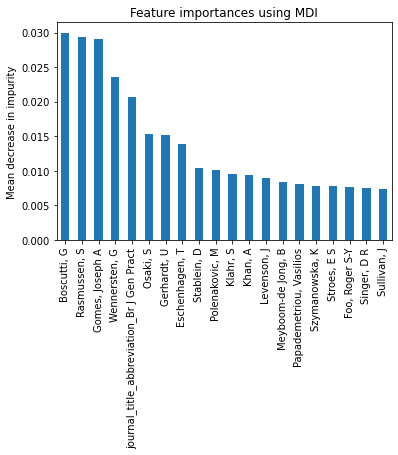


Initial number of features: 4
Number of features after removing the ones with equal or less than 0.002 importance: 4 



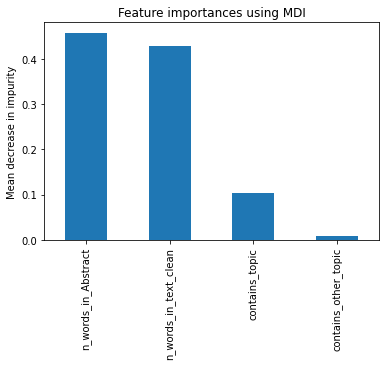


Initial number of features: 4934
Number of features after removing the ones with equal or less than 0.002 importance: 179 



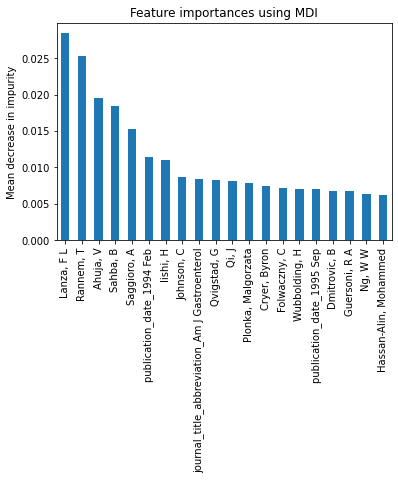

In [34]:
# creating the random forest that computes feature importance

for i in dataset:

  forest = RandomForestClassifier(random_state=0)
  forest.fit(dataset[i][dataset[i].columns.difference(["text", "text_clean", "Label"])], dataset[i]["Label"])

  #computing feature importance
  importances = forest.feature_importances_

  features = list(set(dataset[i].columns) - set(["text", "text_clean", "Label"])) #all columns except text, text_clean and Label

  forest_importances = pd.Series(importances, index=features) 
  forest_importances = forest_importances.sort_values(ascending=False)

  print("\nInitial number of features:", len(forest_importances))

  #non-important features
  non_important_features = forest_importances.where(forest_importances <= 0.002)
  non_important_features = non_important_features.dropna()

  #important features
  forest_importances = forest_importances.where(forest_importances > 0.002)
  forest_importances = forest_importances.dropna()
  print("Number of features after removing the ones with equal or less than 0.002 importance:", len(forest_importances), "\n")

  #visualization of the top 20 features sorted by importance
  fig, ax = plt.subplots()
  forest_importances.head(20).plot.bar(ax=ax)
  plt.title("Feature importances using MDI")
  ax.set_ylabel("Mean decrease in impurity")
  plt.show()

  #removing non important features from the dataset
  dataset[i].drop(non_important_features.index, axis = 1, inplace=True)

In [35]:
#saving the preprocessed datasets
with open(path + "/preprocessed_ace2.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["ace"].to_csv(f) 
with open(path + "/preprocessed_copd2.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["copd"].to_csv(f) 
with open(path + "/preprocessed_ppi2.csv", 'w', encoding = 'utf-8-sig') as f:
  dataset["ppi"].to_csv(f) 